<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

[breast-histopathology-images](https://www.kaggle.com/paultimothymooney/breast-histopathology-images)

https://www.kaggle.com/debajyoti1/cnn-breast-idc

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from glob import glob
import random
from tensorflow import keras
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
mypaths=[]
for name in glob('Inputs/IDC_regular_ps50_idx5/*',recursive=True):
    mypaths.append(name)
print(mypaths[:5])


['Inputs/IDC_regular_ps50_idx5/9036', 'Inputs/IDC_regular_ps50_idx5/10268', 'Inputs/IDC_regular_ps50_idx5/10257', 'Inputs/IDC_regular_ps50_idx5/8913', 'Inputs/IDC_regular_ps50_idx5/13613']


In [3]:
mp=mypaths[60:75]
imagePatches=[]
for i in mp:
    imagePatches+=glob(i+'/*/*.png', recursive=True)


In [4]:
print('total no. of images selected from total images is '+str(len(imagePatches)))


total no. of images selected from total images is 13176


In [5]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)


In [6]:
print('Among them, '+str(len(class0))+' is clss0 and '+str(len(class1))+' is class1')


Among them, 10096 is clss0 and 3080 is class1


In [7]:
sampled_class0 = random.sample(class0, len(class1))
sampled_class1 = random.sample(class1, len(class1))
print(len(sampled_class0), len(sampled_class1))


3080 3080


In [8]:
from matplotlib.image import imread
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import skimage.io

def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = skimage.io.imread(i)
            img_sized = resize(img, (224, 224))
            img_arrays.append([img_sized, label])
    return img_arrays


In [9]:
%%time 
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

CPU times: user 41.4 s, sys: 977 ms, total: 42.4 s
Wall time: 14.5 s


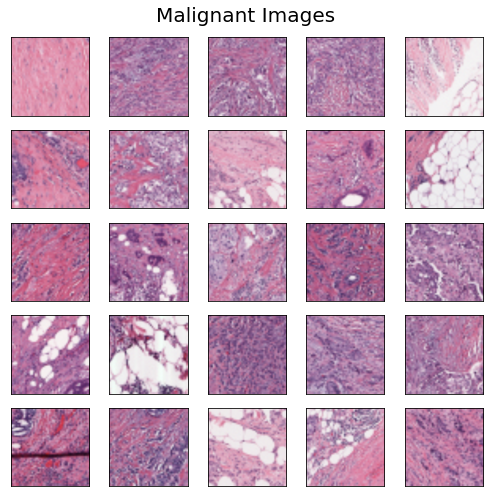

In [10]:

plt.figure(figsize=(7,7))
plt.suptitle("Malignant Images", fontsize=20)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class1_array[i][0])
#    plt.imshow(train_images[i], cmap=plt.cm.binary)
#    plt.xlabel(class_names[train_labels[i]])

plt.tight_layout()
plt.savefig('Cancer-Images.png')  


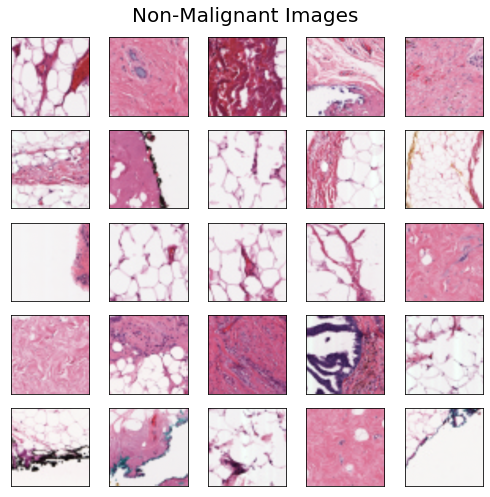

In [11]:
plt.figure(figsize=(7,7))
plt.suptitle("Non-Malignant Images", fontsize=20)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(class0_array[i][0])
#    plt.imshow(train_images[i], cmap=plt.cm.binary)
#    plt.xlabel(class_names[train_labels[i]])
plt.tight_layout()
plt.savefig('non-Cancer-Images.png')  
plt.show()


In [12]:
combined_data = np.concatenate((class0_array, class1_array))

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1, 224, 224, 3)


In [16]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(4620, 224, 224, 3) (1540, 224, 224, 3) (4620, 2) (1540, 2)


In [17]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Dense,Flatten, BatchNormalization

def createModel():
    model = models.Sequential()
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     padding='same', activation='relu', 
                     input_shape=(224, 224, 3)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2,2), padding='valid'))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2,2), padding='valid'))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2,2), padding='valid'))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2,2), padding='valid'))
    model.add(Dropout(0.25))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(BatchNormalization())    
    model.add(MaxPooling2D(pool_size=(2, 2), 
                           strides=(2,2), padding='valid'))
    model.add(Dropout(0.25))

    # FC Layers 
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
    return model

model = createModel()

2021-09-16 15:26:15.097220: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-16 15:26:15.112001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [18]:
import visualkeras
#from PIL import ImageFont
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D


visualkeras.layered_view(model, color_map=color_map, legend=True)



NameError: name 'color_map' is not defined

In [ ]:
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 128)     1

In [20]:
model.compile(
    optimizer=tf.optimizers.Adam(lr=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/Users/gimoonnam/miniforge3/envs/tf25/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
%%time 
history=model.fit(X_train,y_train, 
                  validation_data=(X_test, y_test),
                  epochs=10)


2021-09-16 15:26:55.094914: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-16 15:26:55.099419: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2021-09-16 15:26:55.542238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


145/145 [==============================] - ETA: 0s - loss: 0.9983 - accuracy: 0.6942

2021-09-16 15:31:54.792411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


145/145 [==============================] - 321s 2s/step - loss: 0.9983 - accuracy: 0.6942 - val_loss: 0.7731 - val_accuracy: 0.4896
Epoch 2/10
145/145 [==============================] - 315s 2s/step - loss: 0.6625 - accuracy: 0.7963 - val_loss: 1.0660 - val_accuracy: 0.4896
Epoch 3/10
145/145 [==============================] - 327s 2s/step - loss: 0.6044 - accuracy: 0.8035 - val_loss: 1.4004 - val_accuracy: 0.4896
Epoch 4/10
145/145 [==============================] - 341s 2s/step - loss: 0.5449 - accuracy: 0.8121 - val_loss: 1.3116 - val_accuracy: 0.4896
Epoch 5/10
145/145 [==============================] - 348s 2s/step - loss: 0.5079 - accuracy: 0.8201 - val_loss: 0.7843 - val_accuracy: 0.5409
Epoch 6/10
145/145 [==============================] - 334s 2s/step - loss: 0.4861 - accuracy: 0.8238 - val_loss: 0.5599 - val_accuracy: 0.7097
Epoch 7/10
145/145 [==============================] - 342s 2s/step - loss: 0.4647 - accuracy: 0.8318 - val_loss: 0.4756 - val_accuracy: 0.7981
Epoch 8/10

In [22]:
e=model.evaluate(X_test,y_test)

49/49 [==============================] - 29s 572ms/step - loss: 0.4074 - accuracy: 0.8461


In [23]:
print(e)


[0.4073692262172699, 0.8461039066314697]


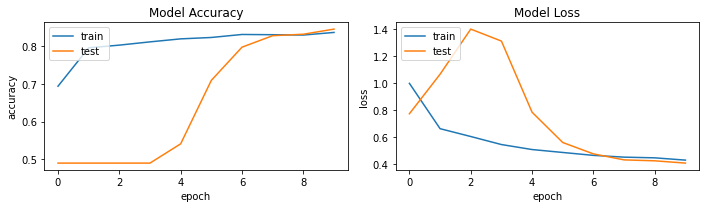

In [24]:
#plotting the Accuracy of test and training sets

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()
plt.savefig('loss_acc_vgg13.png')

plt.show()

In [25]:
y_pred=model.predict(X_test)


2021-09-16 16:23:44.225374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [26]:
y_pred[21]


array([0.84786445, 0.15213554], dtype=float32)

In [27]:
Y_pred=[]
for i in y_pred:
    if i[0]>i[1]:
        Y_pred.append(0)
    else:
        Y_pred.append(1)

In [28]:
Y_test=[]
for i in y_test:
    if i[0]>i[1]:
        Y_test.append(0)
    else:
        Y_test.append(1)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print('Classification Report')
print(classification_report(Y_test, Y_pred, target_names=['Negative','Positive']))


Confusion Matrix
[[632 154]
 [ 83 671]]
Classification Report
              precision    recall  f1-score   support

    Negative       0.88      0.80      0.84       786
    Positive       0.81      0.89      0.85       754

    accuracy                           0.85      1540
   macro avg       0.85      0.85      0.85      1540
weighted avg       0.85      0.85      0.85      1540



In [30]:
model.save('modelcnn.h5')


In [31]:
confusionmatrix=confusion_matrix(Y_test, Y_pred)
confusionmatrix.shape


(2, 2)

In [32]:
classes=[0,1]
con_mat_df = pd.DataFrame(confusion_matrix(Y_test, Y_pred),
                     index = classes, 
                     columns = classes)


In [33]:
import seaborn as sns

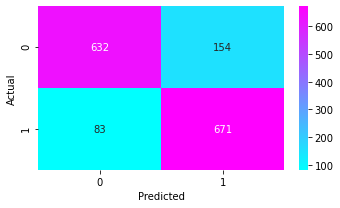

In [34]:
figure = plt.figure(figsize=(5, 3))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.savefig('CM_by_vgg13.png')

plt.show()